In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('traffic-count-data.csv')

The metric I'll be looking at to determine Pittsburgh's best neighborhood is how good each neighborhood's drivers. Specifically, we'll determine what percentage of drivers in each neighborhood was measured driving over the speed limit, and how far off of the speed limit the average driver drives.

In [28]:
# Isolating the data we'll use to determine which neighboorhood has the best traffic - average speed limit, average speed, and % of drivers speeding.
filteredData = data[['neighborhood','speed_limit','median_speed','percent_over_limit', 'average_daily_car_traffic']].copy()
filteredData['pol'] = filteredData['percent_over_limit'] * filteredData['average_daily_car_traffic']
groupedData = filteredData.groupby('neighborhood').agg({'speed_limit': 'mean','median_speed': 'mean','pol' : 'sum', 'average_daily_car_traffic' : 'sum'}).round(3).dropna()
groupedData['percent_over_limit'] = (groupedData['pol'] / groupedData['average_daily_car_traffic']).round(3)
groupedData = groupedData[['speed_limit','median_speed','percent_over_limit']]
print(groupedData)

                  speed_limit  median_speed  percent_over_limit
neighborhood                                                   
Allegheny Center       25.000        27.000              65.000
Allegheny West         25.000        20.000              11.000
Arlington              25.000        26.500              61.191
Beechview              25.000        26.667              68.926
Bloomfield             27.727        22.467              21.270
...                       ...           ...                 ...
Summer Hill            25.000        26.000              55.000
Upper Hill             25.000        22.767              16.197
West Oakland           25.000        23.000              28.000
Westwood               31.667        36.500              52.714
Windgap                28.333        29.000              43.358

[61 rows x 3 columns]


Here, we'll take a ratio of median speed to the speed limit, and adjust that into a "speed score" out of 100. We'll also create a "speeding score" of the percentage of drivers that weren't speeding.

In [29]:
# Turning average speed limit and average speed into a score from 0-100, based on what % of the speed limit the average driver is driving at.
groupedData['speed_score'] = 100 - (abs(((groupedData['median_speed'] / groupedData['speed_limit']* 100)) - 100).round(3).astype(str)).astype(float)

# Turning % of drivers speeding into a score from 0-100, based on how low the % is.
groupedData['speeding_score'] = abs(100 - groupedData['percent_over_limit'])

print(groupedData)

                  speed_limit  median_speed  percent_over_limit  speed_score  \
neighborhood                                                                   
Allegheny Center       25.000        27.000              65.000       92.000   
Allegheny West         25.000        20.000              11.000       80.000   
Arlington              25.000        26.500              61.191       94.000   
Beechview              25.000        26.667              68.926       93.332   
Bloomfield             27.727        22.467              21.270       81.029   
...                       ...           ...                 ...          ...   
Summer Hill            25.000        26.000              55.000       96.000   
Upper Hill             25.000        22.767              16.197       91.068   
West Oakland           25.000        23.000              28.000       92.000   
Westwood               31.667        36.500              52.714       84.738   
Windgap                28.333        29.

Now, we can display our 10 best and worst neighborhoods by each sub-metric as a graph.

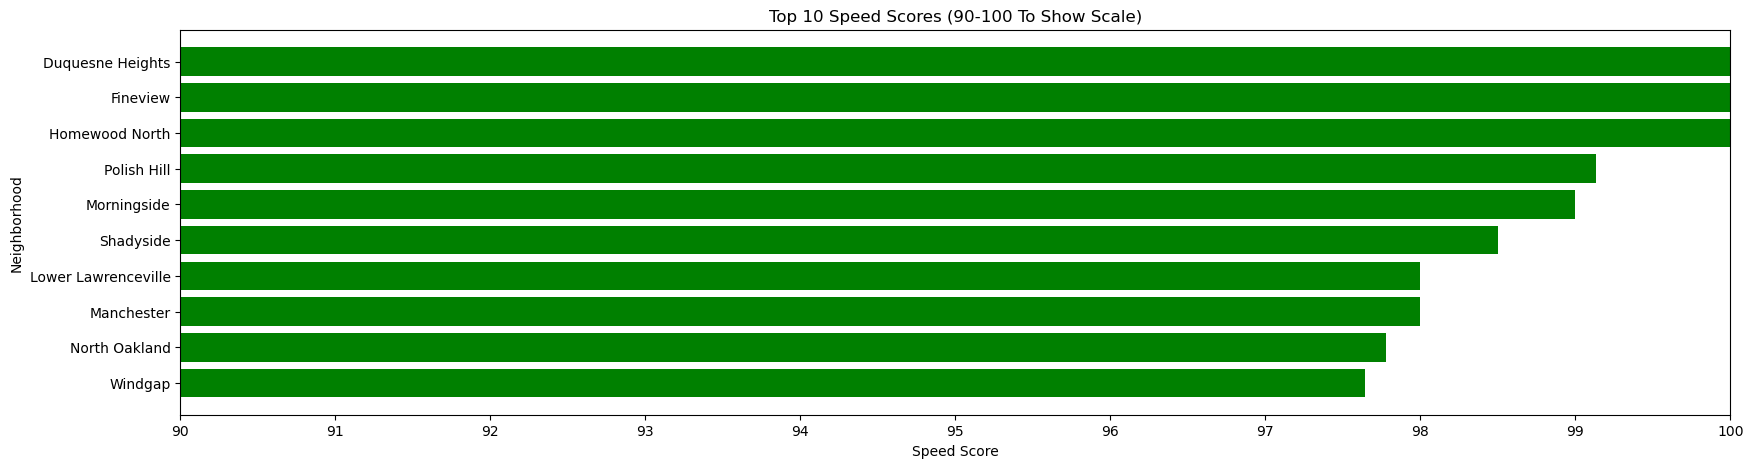

In [30]:
# Displaying the 10 best speed scores
speedSortedDesc = groupedData.sort_values(by='speed_score', ascending=False).reset_index()
topTenSpeed = speedSortedDesc.head(10)

plt.figure(figsize=(20,5))
plt.barh(topTenSpeed["neighborhood"], topTenSpeed["speed_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("Speed Score")
plt.title("Top 10 Speed Scores (90-100 To Show Scale)")
plt.xlim(90,100)
plt.xticks(range(90, 101, 1))
plt.gca().invert_yaxis()
plt.show()

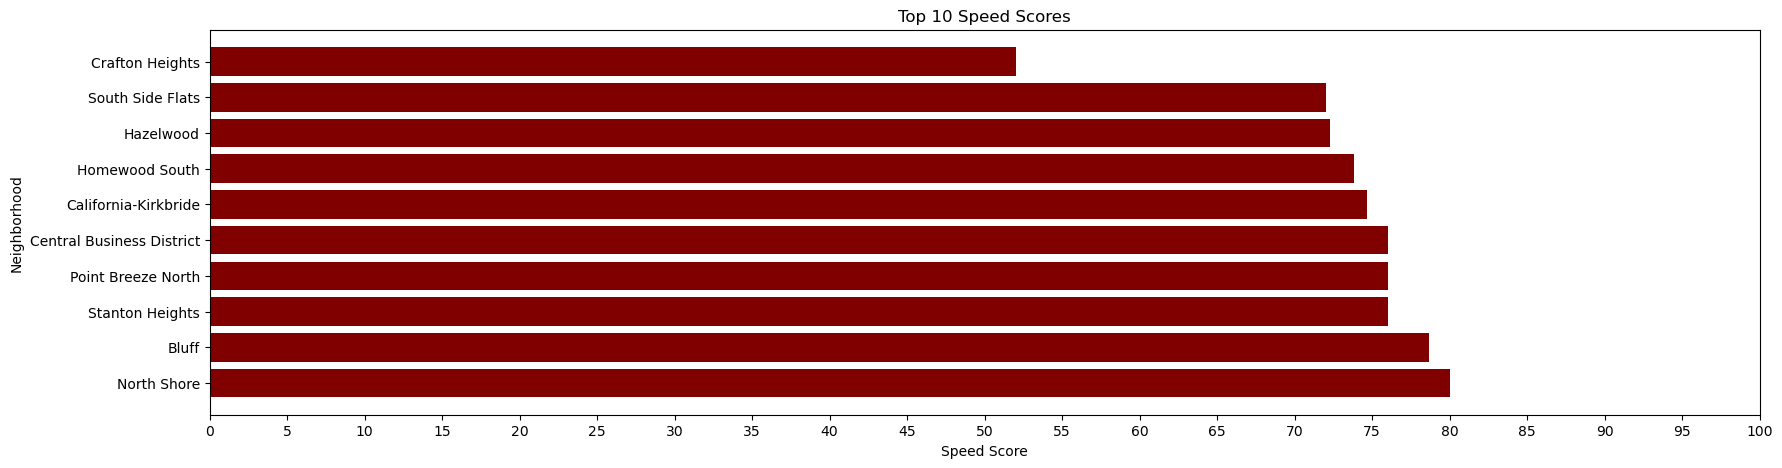

In [31]:
# Displaying the 10 worst speed scores
speedSortedAsc = groupedData.sort_values(by='speed_score').reset_index()
botTenSpeed = speedSortedAsc.head(10)

plt.figure(figsize=(20,5))
plt.barh(botTenSpeed["neighborhood"], botTenSpeed["speed_score"], color='maroon')
plt.ylabel("Neighborhood")
plt.xlabel("Speed Score")
plt.title("Top 10 Speed Scores")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.gca().invert_yaxis()
plt.show()

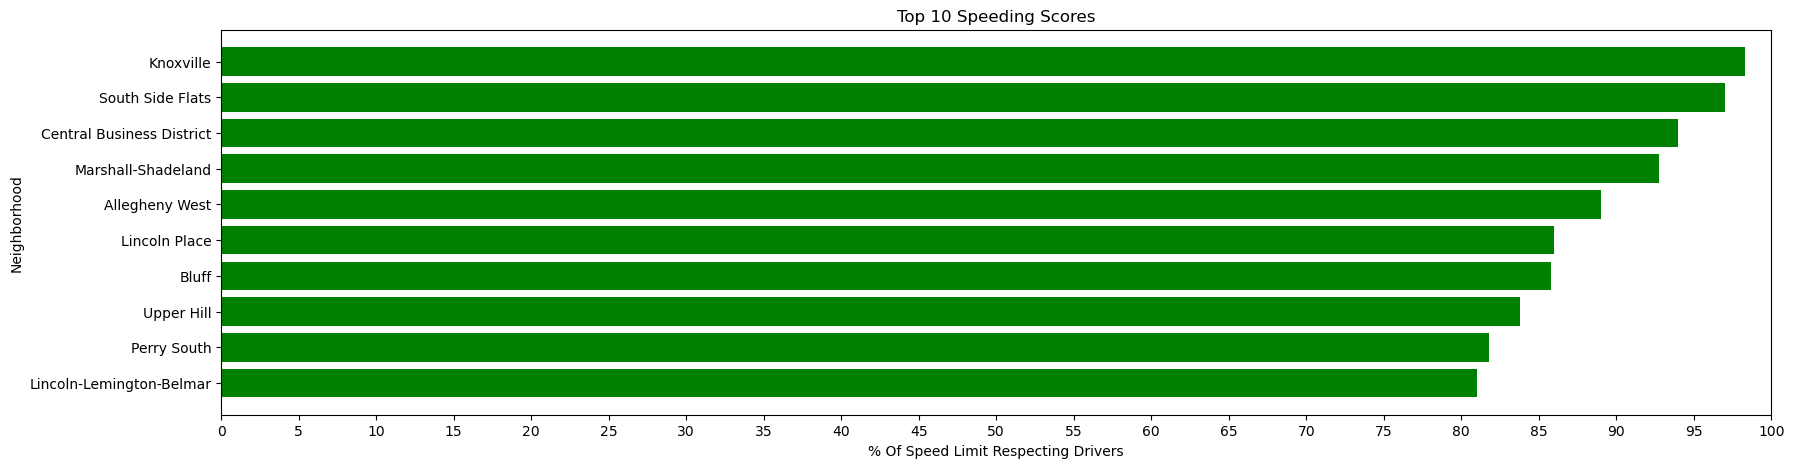

In [32]:
# Displaying the 10 best speeding scores
speedingSortedDesc = groupedData.sort_values(by='speeding_score', ascending=False).reset_index()
topTenSpeeding = speedingSortedDesc.head(10)

plt.figure(figsize=(20,5))
plt.barh(topTenSpeeding["neighborhood"], topTenSpeeding["speeding_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("% Of Speed Limit Respecting Drivers")
plt.title("Top 10 Speeding Scores")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.gca().invert_yaxis()
plt.show()

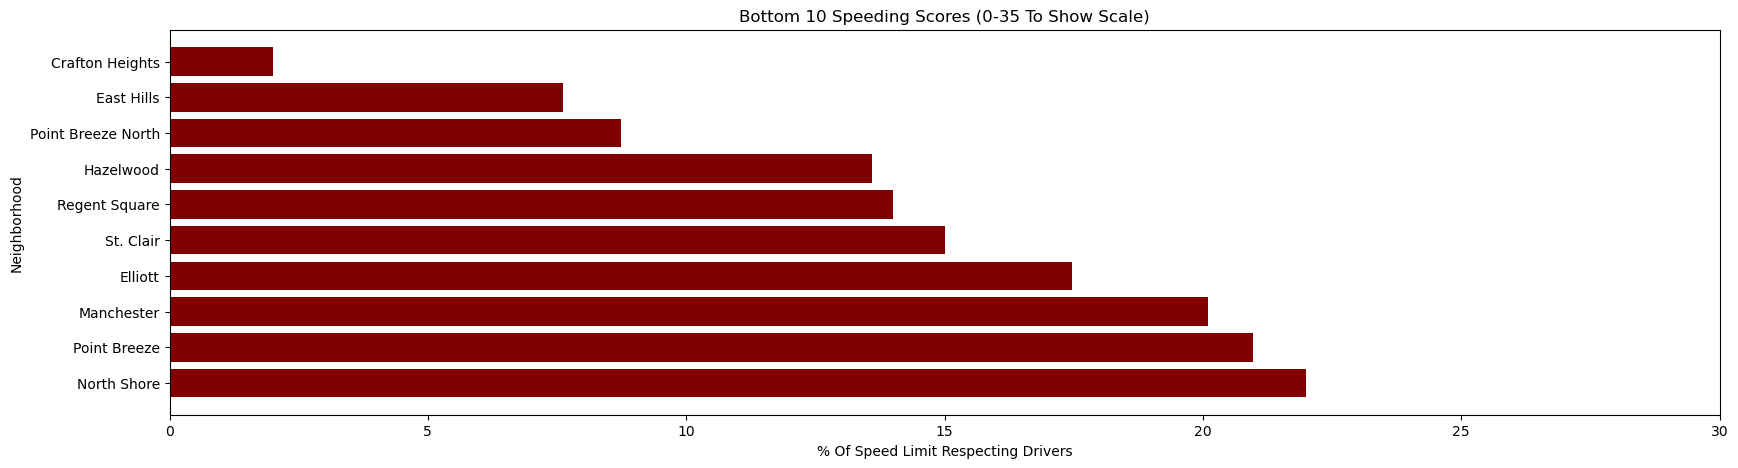

In [33]:
# Displaying the 10 worst speeding scores
speedingSortedAsc = groupedData.sort_values(by='speeding_score').reset_index()
botTenSpeeding = speedingSortedAsc.head(10)

plt.figure(figsize=(20,5))
plt.barh(botTenSpeeding["neighborhood"], botTenSpeeding["speeding_score"], color='maroon')
plt.ylabel("Neighborhood")
plt.xlabel("% Of Speed Limit Respecting Drivers")
plt.title("Bottom 10 Speeding Scores (0-35 To Show Scale)")
plt.xlim(0,30)
plt.xticks(range(0, 31, 5))
plt.gca().invert_yaxis()
plt.show()

Looking at our graphs, we can see that Duquense Heights and Knoxville drivers are closest to the speed limit and speed the least, respectively. We can also see that Crafton Heights has the worst drivers by both metrics. This is great and all, but to get a clear picture of which neighborhoods have the best drivers, we'll need to use both scores together. To do this, we'll average the two out into one "combined score".

In [34]:
# Finding the combined scores
groupedData.reset_index()
groupedData['combined_score'] = ((groupedData['speed_score'] + groupedData['speeding_score'])/2).round(3)
print(groupedData.sort_values(by='combined_score', ascending=False))

                    speed_limit  median_speed  percent_over_limit  \
neighborhood                                                        
Knoxville                25.000        26.000               1.723   
Marshall-Shadeland       25.000        26.857               7.242   
Perry South              28.333        27.000              18.194   
Upper Hill               25.000        22.767              16.197   
North Oakland            30.000        30.667              27.434   
...                         ...           ...                 ...   
East Hills               25.000        28.400              92.388   
Regent Square            25.000        30.000              86.000   
Hazelwood                21.667        27.667              86.397   
Point Breeze North       25.000        31.000              91.262   
Crafton Heights          25.000        37.000              98.000   

                    speed_score  speeding_score  combined_score  
neighborhood                        

Now, we can graph our combined score to clearly see our best and worst drivers.

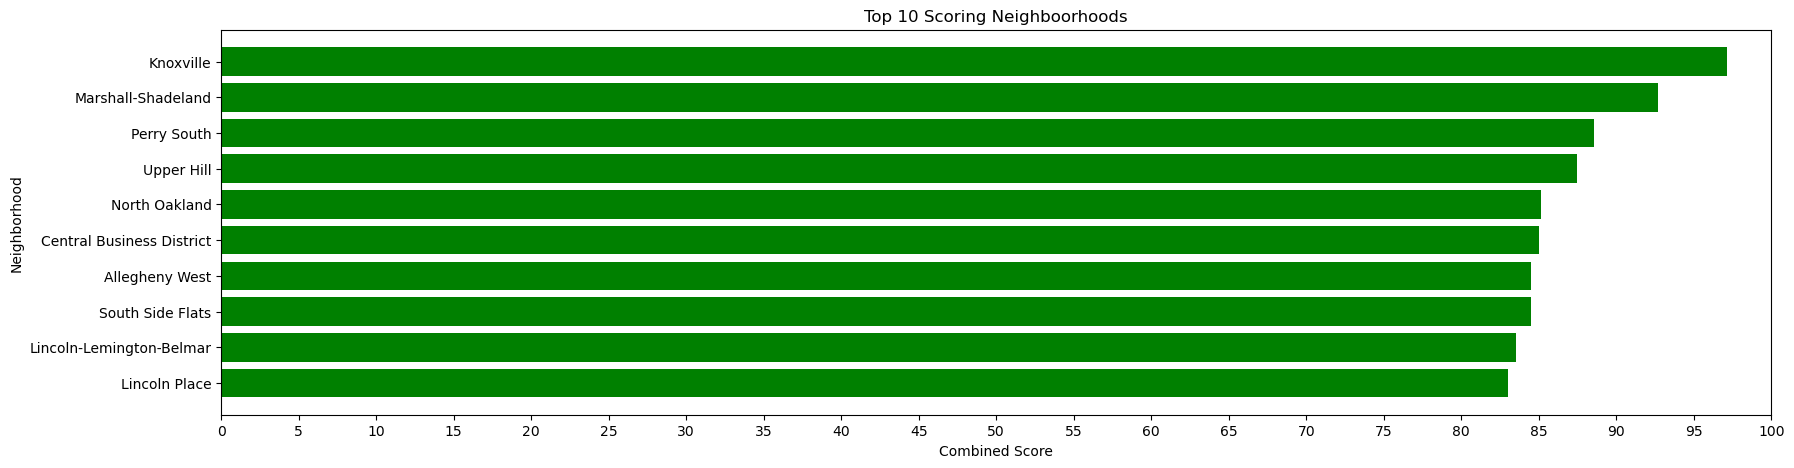

In [35]:
# Displaying the 10 best combined scores
scoreSortedDesc = groupedData.sort_values(by='combined_score', ascending=False).reset_index()
topTenScore = scoreSortedDesc.head(10)

plt.figure(figsize=(20,5))
plt.barh(topTenScore["neighborhood"], topTenScore["combined_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("Combined Score")
plt.title("Top 10 Scoring Neighboorhoods")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.gca().invert_yaxis()
plt.show()

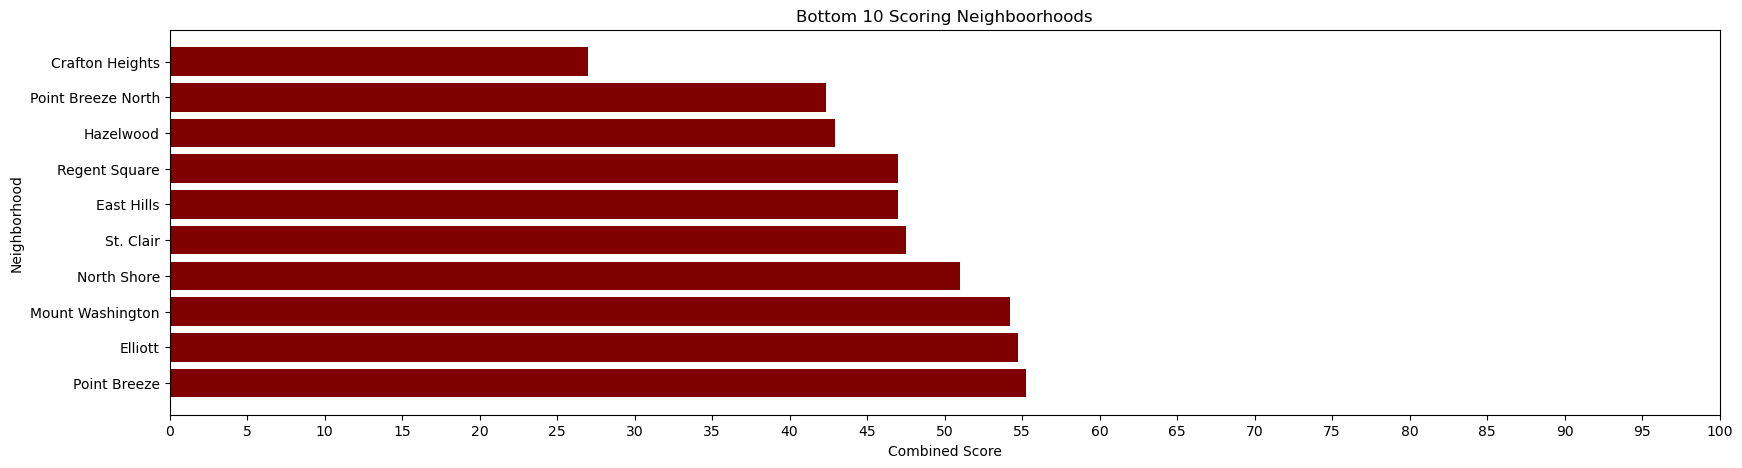

In [36]:
# Displaying the 10 worst combined scores
scoreSortedAsc = groupedData.sort_values(by='combined_score').reset_index()
botTenScore = scoreSortedAsc.head(10)

plt.figure(figsize=(20,5))
plt.barh(botTenScore["neighborhood"], botTenScore["combined_score"], color='maroon')
plt.ylabel("Neighborhood")
plt.xlabel("Combined Score")
plt.title("Bottom 10 Scoring Neighboorhoods")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.gca().invert_yaxis()
plt.show()

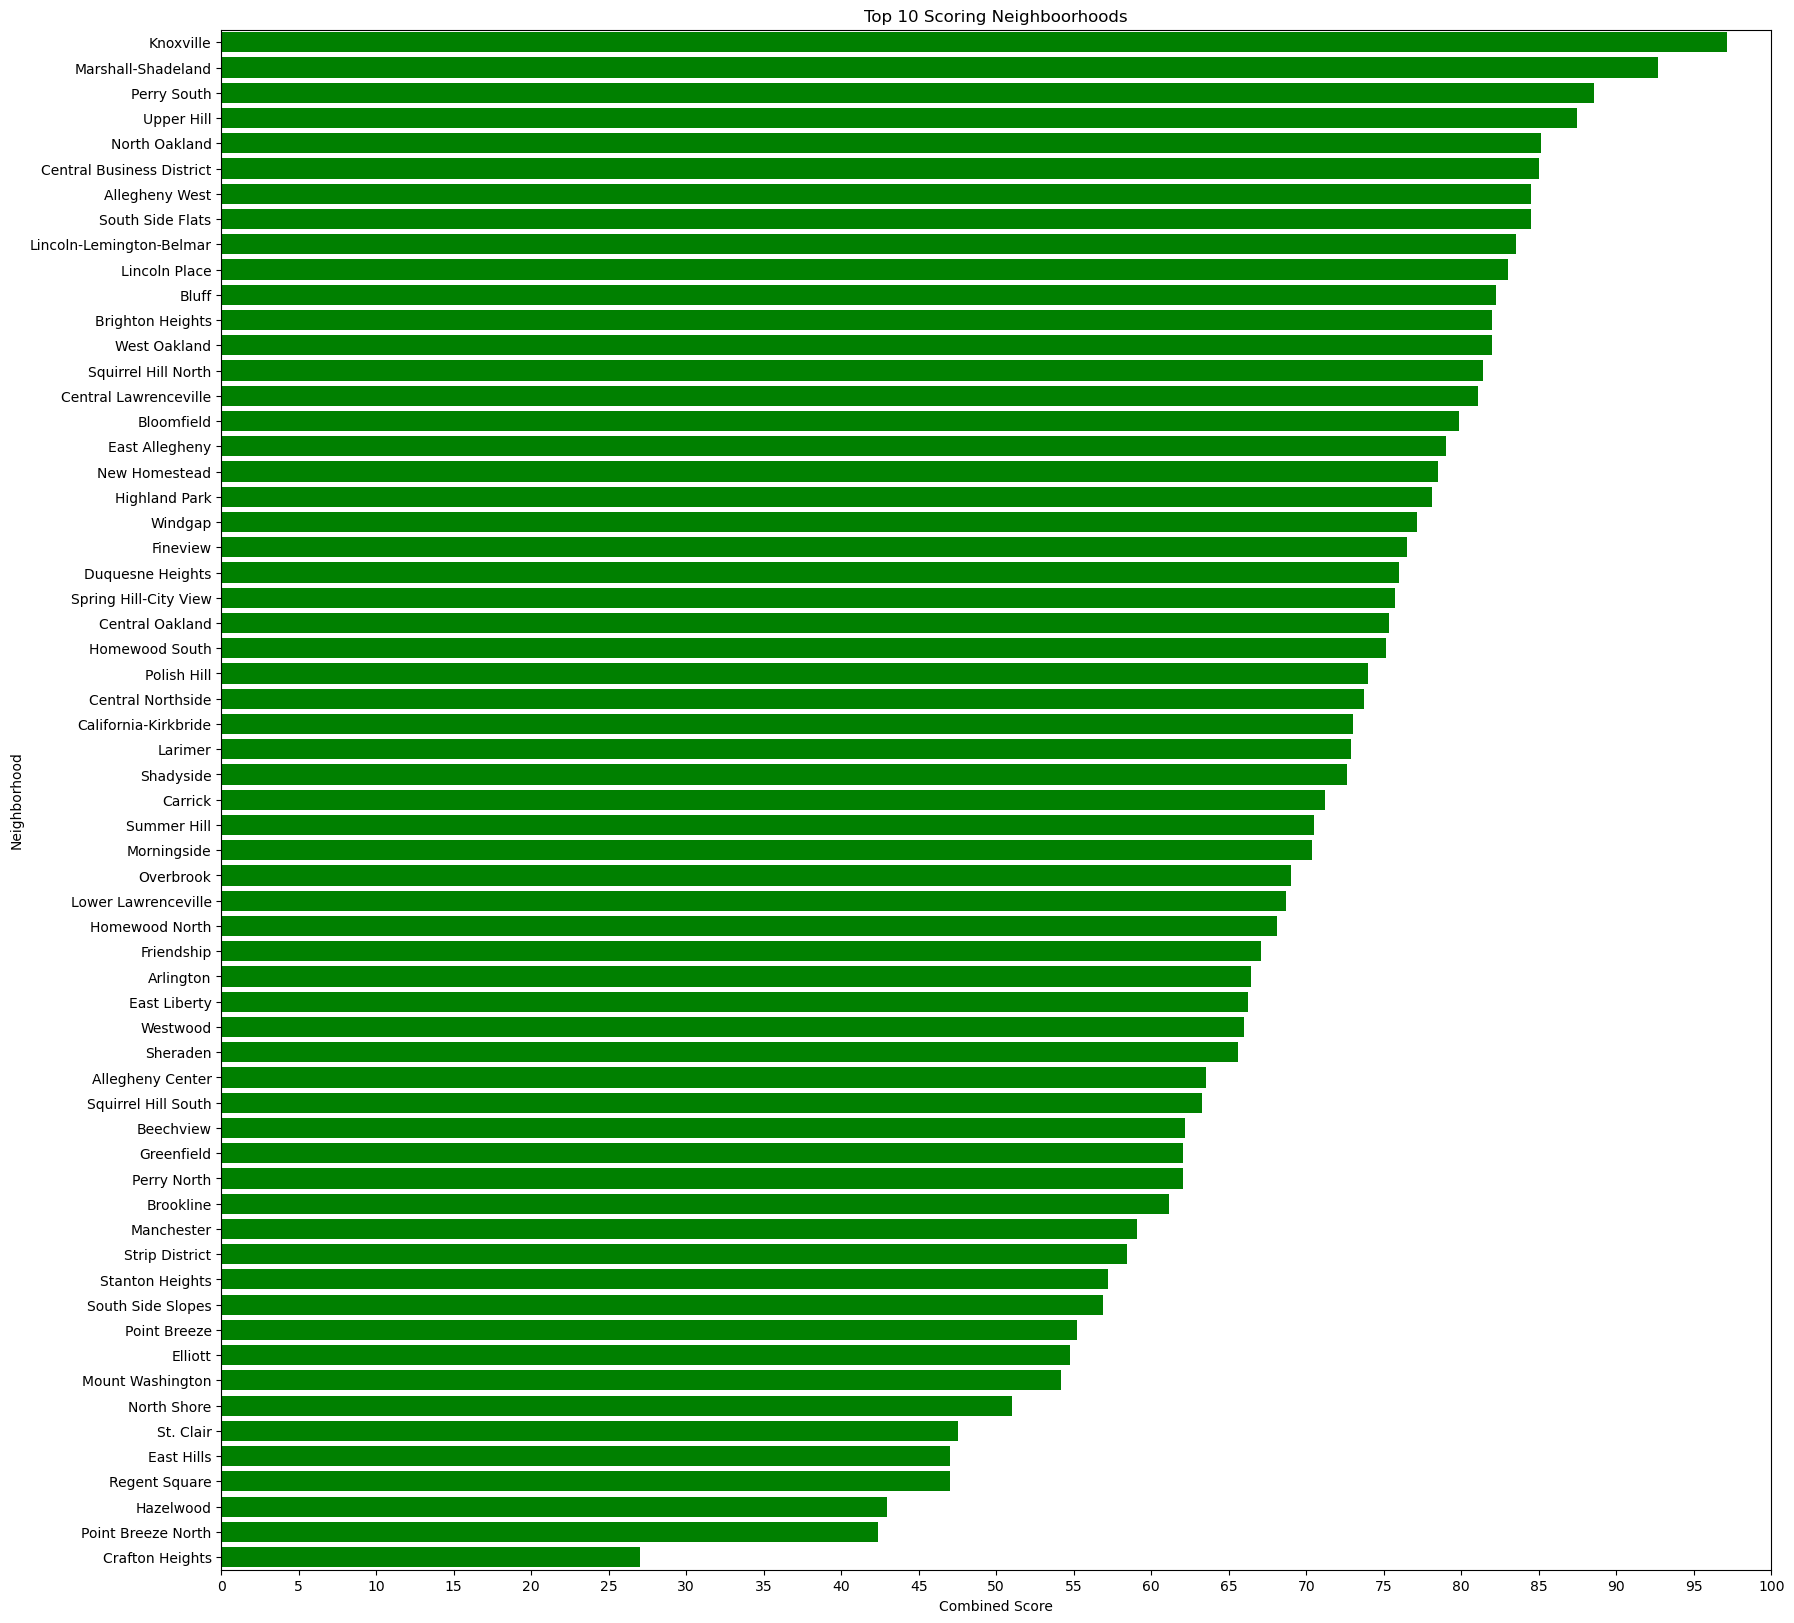

In [39]:
# Displaying every neighborhood's combined score
scoreSortedDesc = groupedData.sort_values(by='combined_score', ascending=False).reset_index()

plt.figure(figsize=(20,20))
plt.barh(scoreSortedDesc["neighborhood"], scoreSortedDesc["combined_score"], color='green')
plt.ylabel("Neighborhood")
plt.xlabel("Combined Score")
plt.title("Top 10 Scoring Neighboorhoods")
plt.xlim(0,100)
plt.xticks(range(0, 101, 5))
plt.ylim(-0.5, len(scoreSortedDesc) - 0.5)
plt.gca().invert_yaxis()
plt.show()

Finally, we can see our that our best drivers are in Knoxville, and the worst are in Crafton Heights!

## Conclusion

Of course, it's impossible to create a comprehensive, objective score for the best neighborhood, especially one that only uses one category. Everyone has a different idea of what makes a neighborhood great, including some factors like proximity to important places, aesthetics, and nostalgia that are impossible to quantify. However, of all the metrics you could look at, quality of drivers is a pretty accurate one. It affects a lot of aspects of daily life - safety, ability to get around quickly, overall frustration, etc. Despite this, I wouldn't say it's the most important quality of a neighborhood, at least not to me. Personally, as someone who only moved to Pittsburgh recently, my favorite neighborhood is Central Oakland, despite its middling score. To me, things like proximity to campus, food options, beauty, and the fact that I live here are more important to my opinion of the ne